In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt

In [4]:
%matplotlib inline

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [7]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2, query_name='affvids_norest')

05/31/2020 13:37:56 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 13:38:05 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 13:38:14 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 13:38:24 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 13:38:33 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

In [8]:
dtfa.load_state('data/affvids_norest_k100_n1000_05302020_174017') 

In [9]:
dtfa.free_energy(batch_size=15, use_cuda=True, blocks_batch_size=8, blocks_filter=affvids_db.inference_filter(training=True))

[[50575998976.0, -50568798208.0, 7199600.0],
 [50576302080.0, -50568351744.0, 7201194.5]]

In [10]:
dtfa.free_energy(batch_size=15, use_cuda=True, blocks_batch_size=8, blocks_filter=affvids_db.inference_filter(training=False))

[[2191051520.0, -2190976256.0, 75432.296875],
 [2201117696.0, -2169934848.0, 75660.453125]]

In [11]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [12]:
def block_task_labeler(block):
    return task_labeler(block.task)

In [13]:
training_filter = affvids_db.inference_filter(training=True)
training_blocks = [b for (b, block) in enumerate(dtfa._blocks) if training_filter(block)]

In [14]:
len(training_blocks)

690

In [15]:
validation_filter = affvids_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [16]:
len(validation_blocks)

18

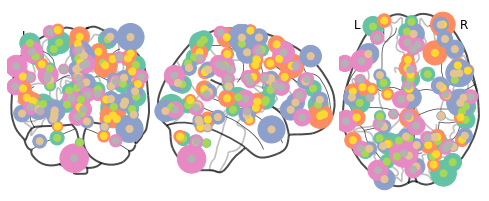

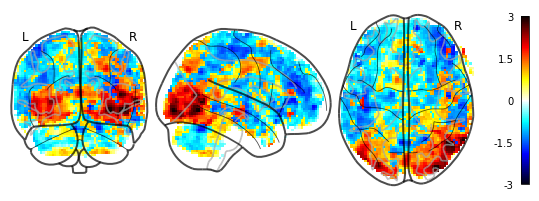

05/31/2020 13:51:17 Reconstruction Error (Frobenius Norm): 1.43429062e+02 out of 1.44898047e+03


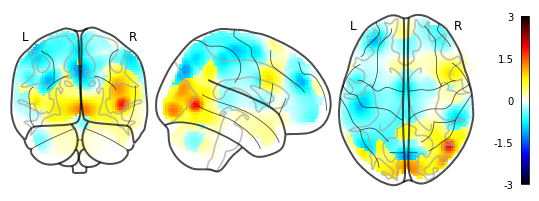

05/31/2020 13:51:19 Reconstruction Error (Frobenius Norm): 1.59306442e+02 out of 1.44898047e+03


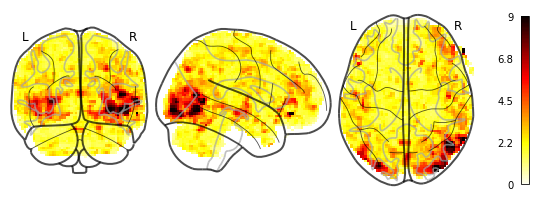

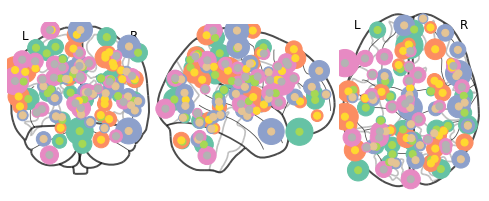

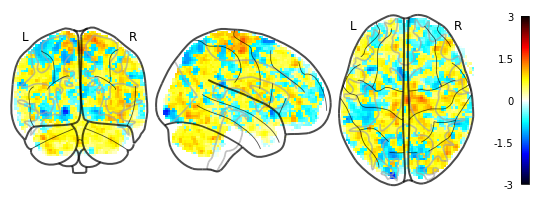

05/31/2020 13:51:23 Reconstruction Error (Frobenius Norm): 1.12947510e+02 out of 1.15141223e+03


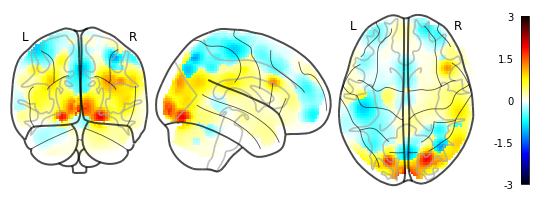

05/31/2020 13:51:25 Reconstruction Error (Frobenius Norm): 9.55129242e+01 out of 1.15141223e+03


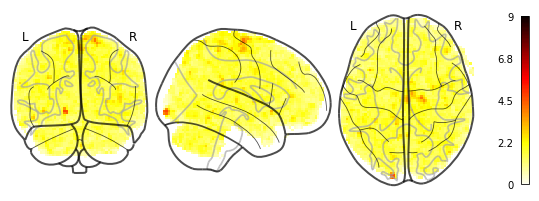

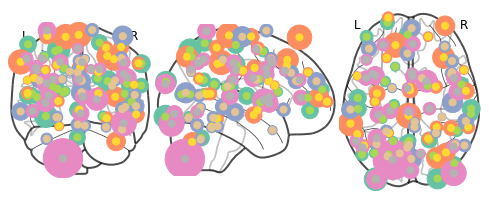

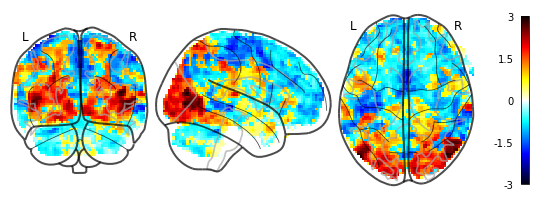

05/31/2020 13:51:29 Reconstruction Error (Frobenius Norm): 1.28731369e+02 out of 1.38316431e+03


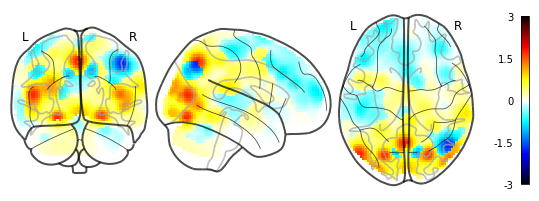

05/31/2020 13:51:31 Reconstruction Error (Frobenius Norm): 1.50350479e+02 out of 1.38316431e+03


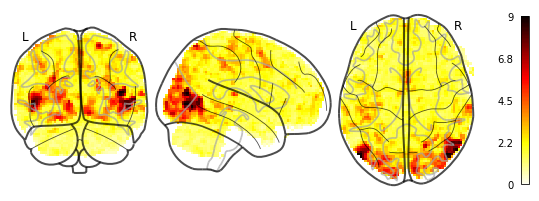

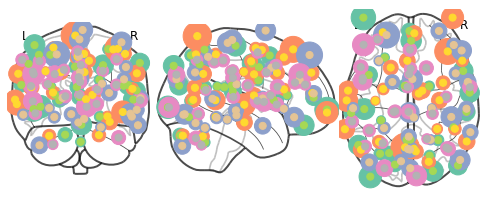

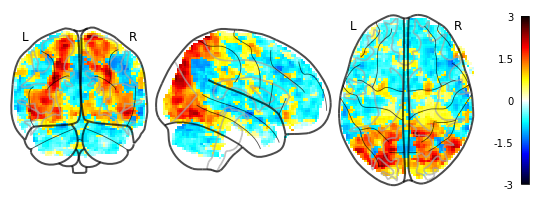

05/31/2020 13:51:36 Reconstruction Error (Frobenius Norm): 1.27251320e+02 out of 1.34216345e+03


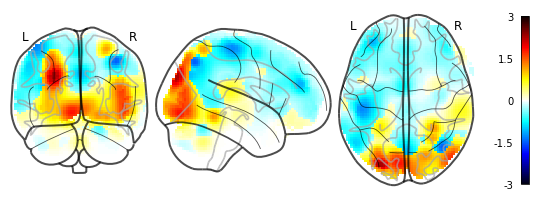

05/31/2020 13:51:38 Reconstruction Error (Frobenius Norm): 1.28654816e+02 out of 1.34216345e+03


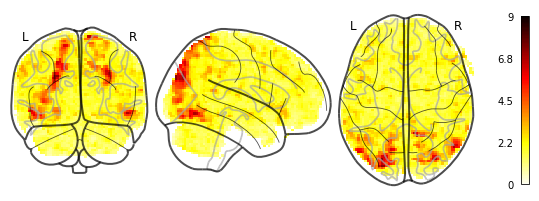

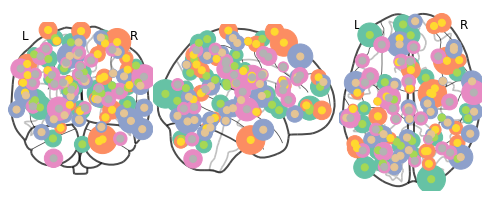

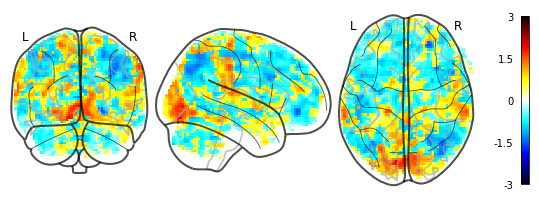

05/31/2020 13:51:42 Reconstruction Error (Frobenius Norm): 1.25980583e+02 out of 1.45477710e+03


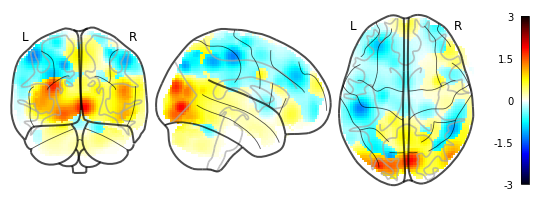

05/31/2020 13:51:44 Reconstruction Error (Frobenius Norm): 1.11319817e+02 out of 1.45477710e+03


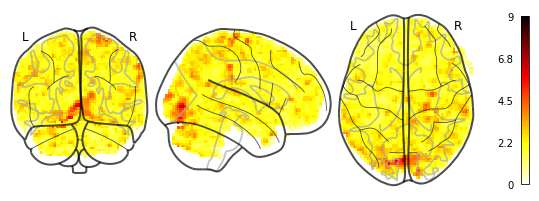

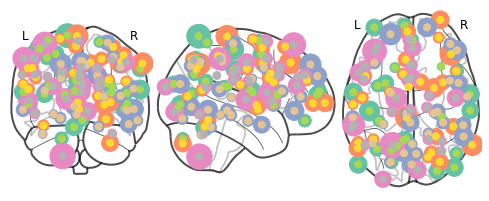

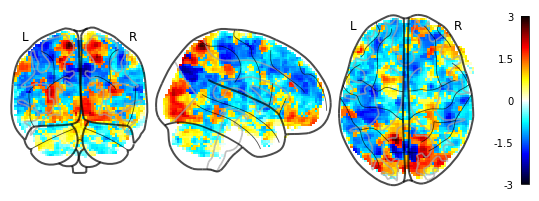

05/31/2020 13:51:49 Reconstruction Error (Frobenius Norm): 1.49184921e+02 out of 1.34210596e+03


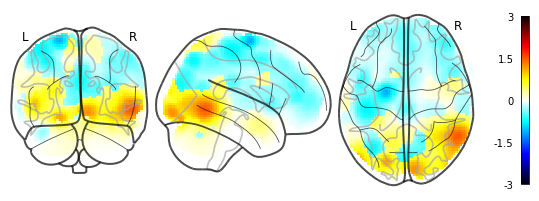

05/31/2020 13:51:51 Reconstruction Error (Frobenius Norm): 1.53833237e+02 out of 1.34210596e+03


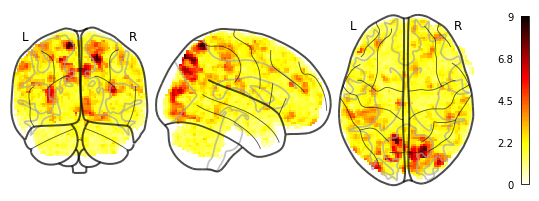

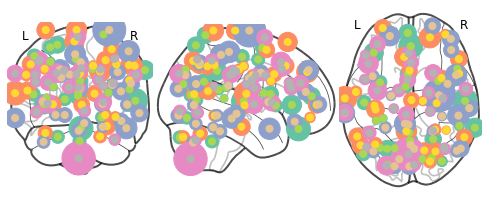

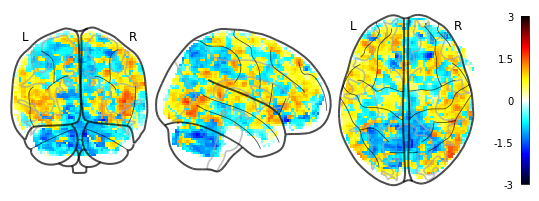

05/31/2020 13:51:55 Reconstruction Error (Frobenius Norm): 1.55557327e+02 out of 1.36306653e+03


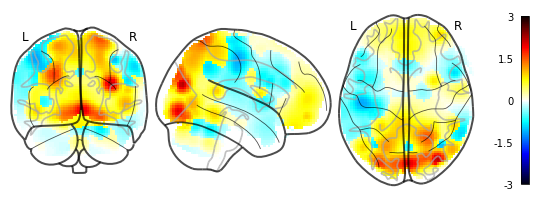

05/31/2020 13:51:57 Reconstruction Error (Frobenius Norm): 1.19492638e+02 out of 1.36306653e+03


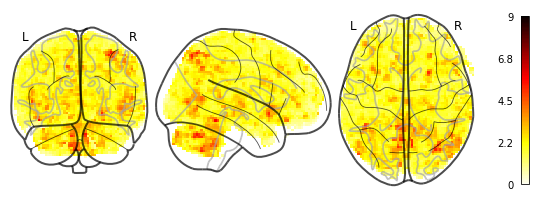

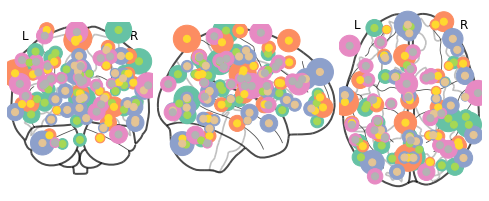

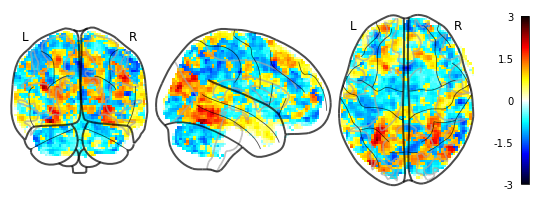

05/31/2020 13:52:02 Reconstruction Error (Frobenius Norm): 1.40335083e+02 out of 1.35525183e+03


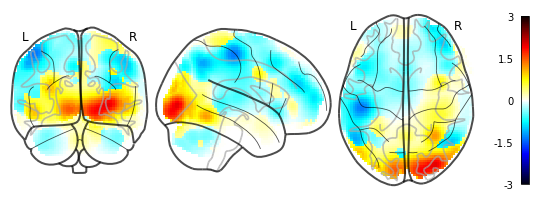

05/31/2020 13:52:04 Reconstruction Error (Frobenius Norm): 1.26236862e+02 out of 1.35525183e+03


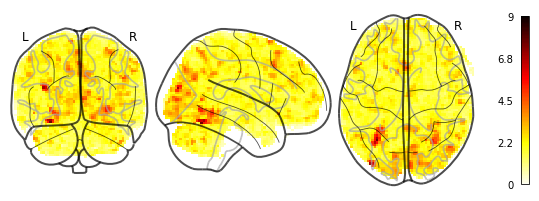

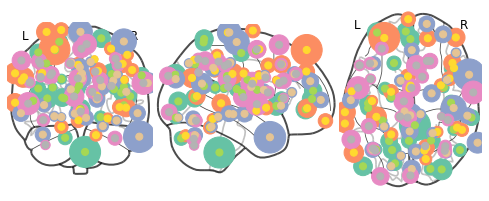

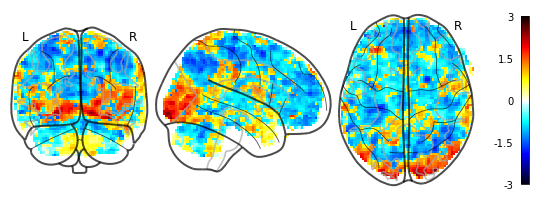

05/31/2020 13:52:08 Reconstruction Error (Frobenius Norm): 1.37979416e+02 out of 1.29164758e+03


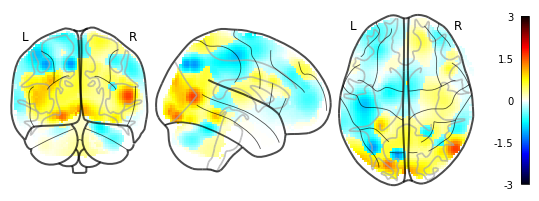

05/31/2020 13:52:10 Reconstruction Error (Frobenius Norm): 1.39512833e+02 out of 1.29164758e+03


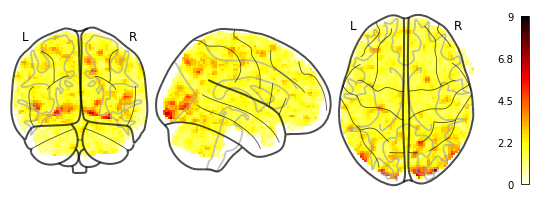

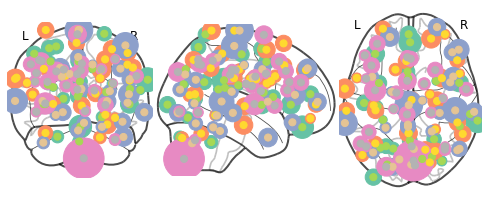

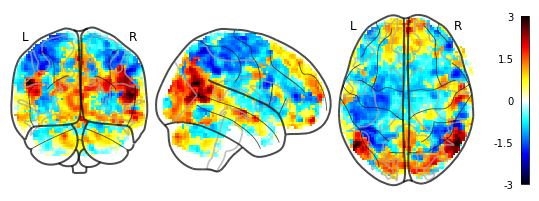

05/31/2020 13:52:15 Reconstruction Error (Frobenius Norm): 1.32379166e+02 out of 1.41417090e+03


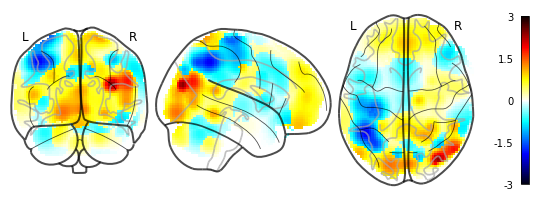

05/31/2020 13:52:17 Reconstruction Error (Frobenius Norm): 1.43953705e+02 out of 1.41417090e+03


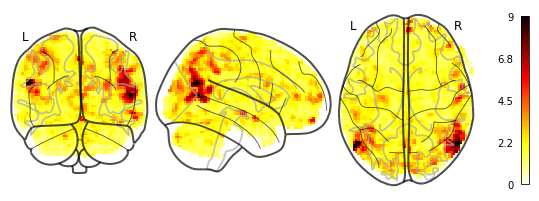

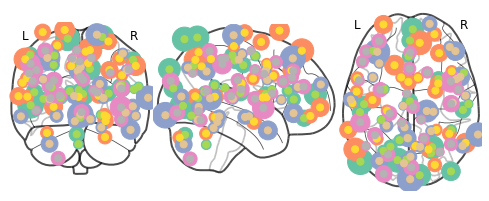

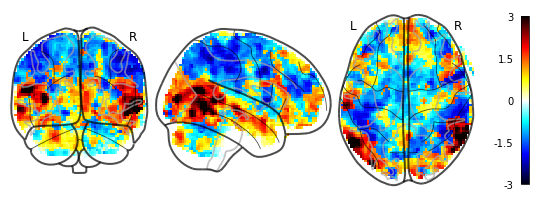

05/31/2020 13:52:21 Reconstruction Error (Frobenius Norm): 1.58198334e+02 out of 1.48346582e+03


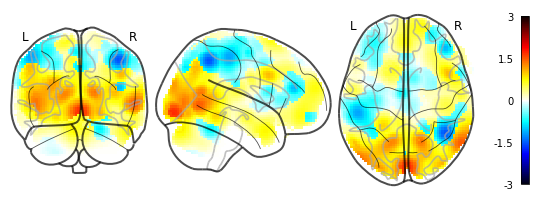

05/31/2020 13:52:23 Reconstruction Error (Frobenius Norm): 1.78243484e+02 out of 1.48346582e+03


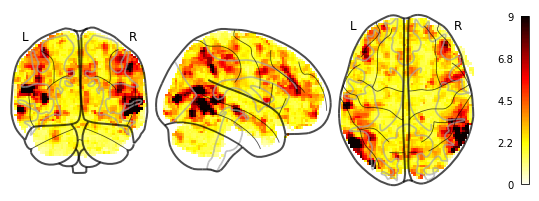

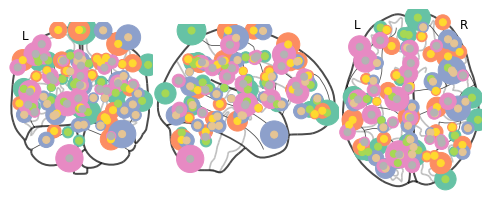

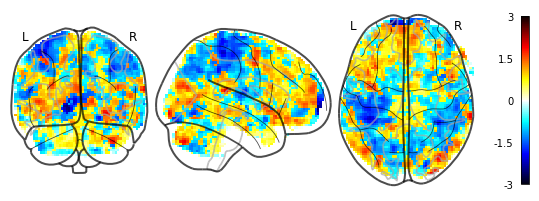

05/31/2020 13:52:27 Reconstruction Error (Frobenius Norm): 1.51906876e+02 out of 1.37664526e+03


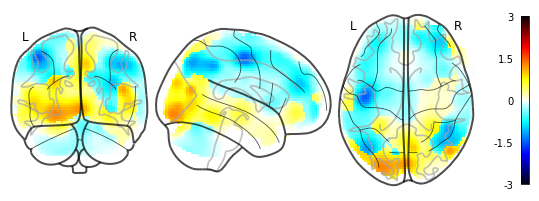

05/31/2020 13:52:29 Reconstruction Error (Frobenius Norm): 1.38542130e+02 out of 1.37664526e+03


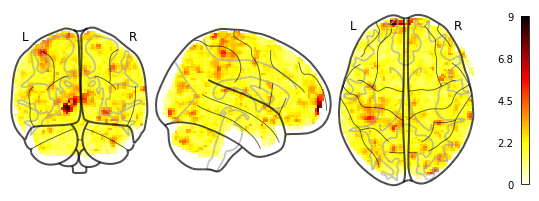

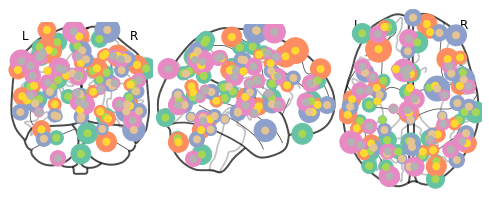

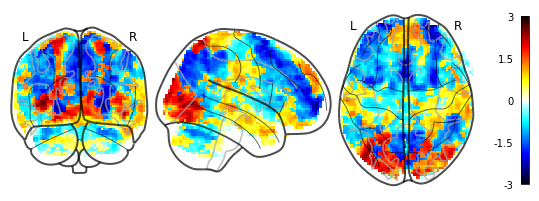

05/31/2020 13:52:34 Reconstruction Error (Frobenius Norm): 1.52932343e+02 out of 1.49215918e+03


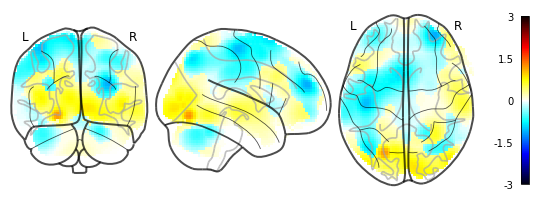

05/31/2020 13:52:36 Reconstruction Error (Frobenius Norm): 1.62905365e+02 out of 1.49215918e+03


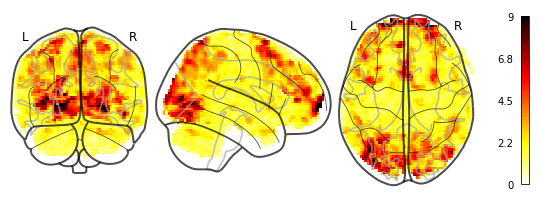

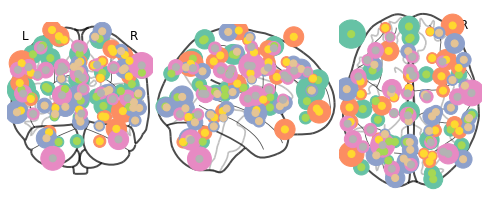

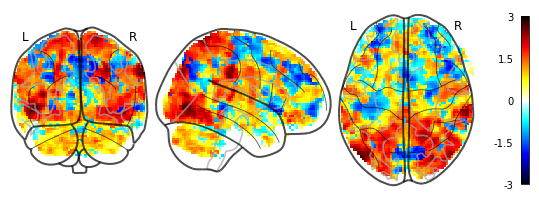

05/31/2020 13:52:40 Reconstruction Error (Frobenius Norm): 1.76669540e+02 out of 1.51273645e+03


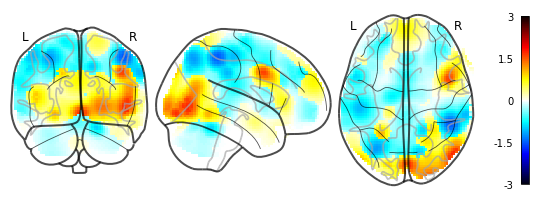

05/31/2020 13:52:42 Reconstruction Error (Frobenius Norm): 1.82744980e+02 out of 1.51273645e+03


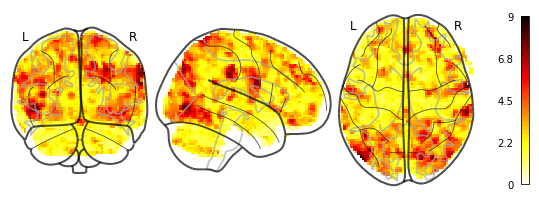

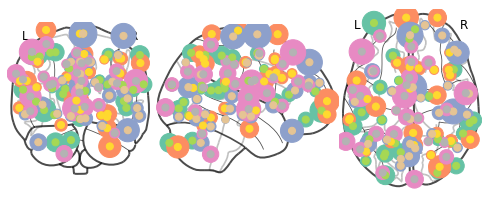

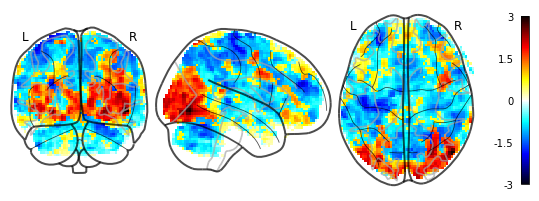

05/31/2020 13:52:47 Reconstruction Error (Frobenius Norm): 1.28267593e+02 out of 1.34157849e+03


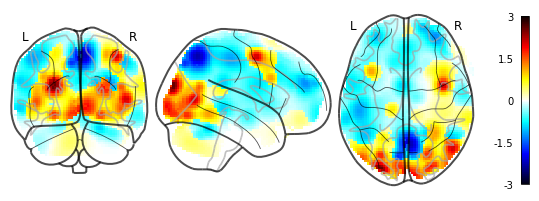

05/31/2020 13:52:49 Reconstruction Error (Frobenius Norm): 1.50432907e+02 out of 1.34157849e+03


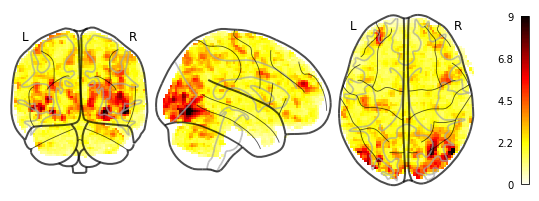

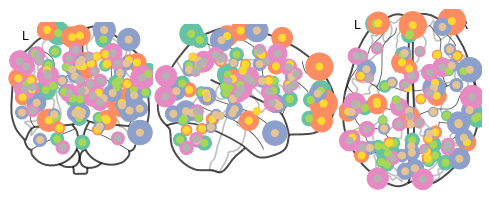

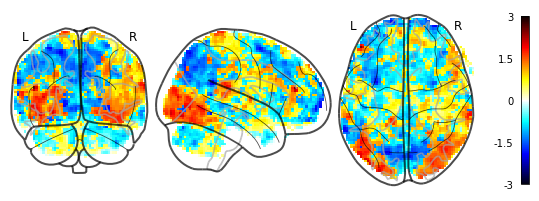

05/31/2020 13:52:53 Reconstruction Error (Frobenius Norm): 1.50267746e+02 out of 1.35104419e+03


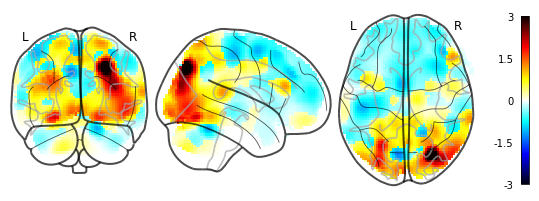

05/31/2020 13:52:55 Reconstruction Error (Frobenius Norm): 1.38514221e+02 out of 1.35104419e+03


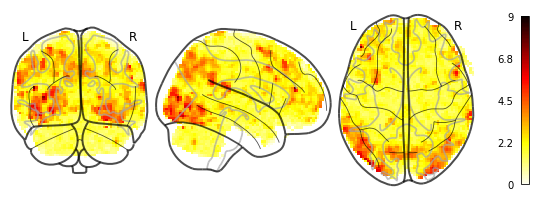

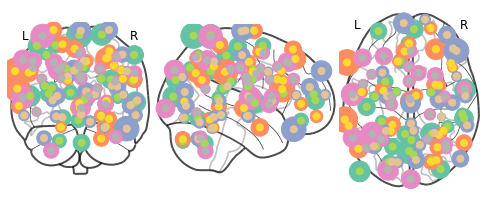

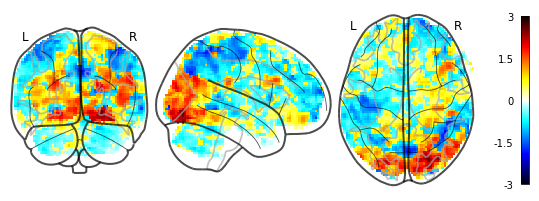

05/31/2020 13:53:00 Reconstruction Error (Frobenius Norm): 9.81894989e+01 out of 1.39665784e+03


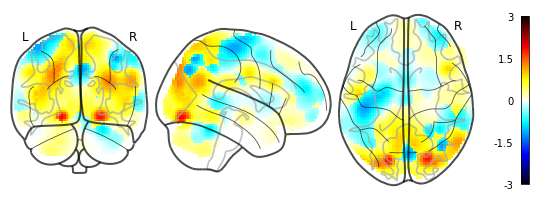

05/31/2020 13:53:01 Reconstruction Error (Frobenius Norm): 1.17453331e+02 out of 1.39665784e+03


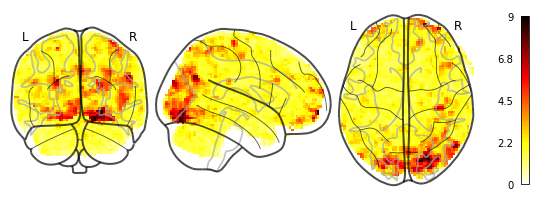

In [17]:
for index in validation_blocks[0:-1:1]:
    dtfa.plot_factor_centers(index)
    dtfa.plot_original_brain(index, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction(index, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction_diff(index, labeler=lambda b: None, t=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


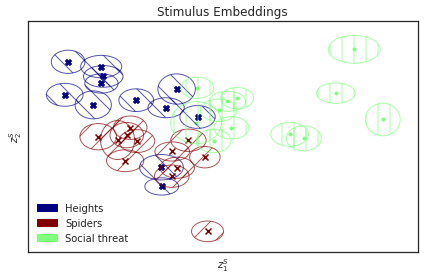

In [18]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='jet',
                            filename='affvids_norest_task_embedding.pdf')

In [19]:
def subject_labeler(subject):
    return 'Subject %d' % subject

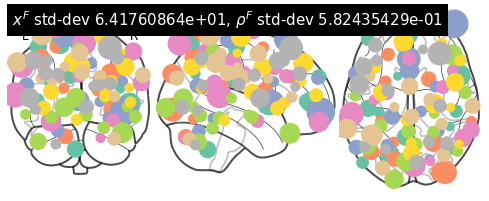

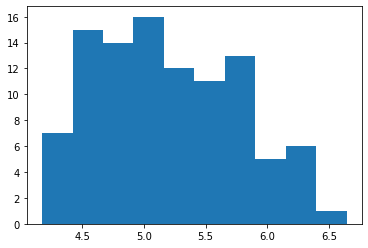

(<nilearn.plotting.displays.OrthoProjector at 0x7f95704f4dd0>,
 tensor([[-3.2358e+01, -2.9558e+01,  2.4856e+01],
         [ 4.8527e+01, -2.7985e+01,  5.1183e+01],
         [ 4.1998e+01, -4.3944e+01,  1.7508e+01],
         [-2.1466e+00,  5.2783e+01,  4.5844e+00],
         [-1.3035e+01,  8.8453e+00,  3.7791e+01],
         [-2.1208e+01, -7.3703e+01,  6.4520e+01],
         [-4.9551e+00, -5.5167e+01, -4.5764e+01],
         [ 4.2899e+01, -6.8081e+01,  3.3874e+01],
         [-4.9885e+01, -8.1985e+01,  3.1756e+00],
         [ 5.2003e+01,  9.6667e+00,  1.9234e+00],
         [-4.4041e+01, -2.5010e+01,  6.1838e+01],
         [-4.4586e+01,  4.7958e+01,  5.5600e+00],
         [-1.0202e+01,  6.1929e+01,  3.0762e+01],
         [ 1.9624e+01,  5.7328e+00,  1.7566e+01],
         [-2.6173e+01, -6.9909e+01, -1.3522e+01],
         [-1.6982e+01, -6.0498e+01,  1.8297e+01],
         [-2.5832e+01,  3.1069e+00,  6.1683e+01],
         [ 3.6860e+01, -9.2270e+01, -3.6899e+00],
         [-3.1269e+01, -3.7765e+01,  

In [20]:
dtfa.visualize_factor_embedding()

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


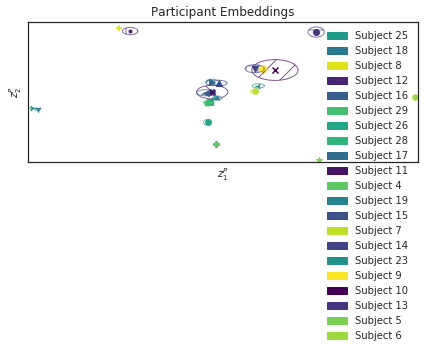

In [21]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [22]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [23]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [24]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [26]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [28]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [29]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [30]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [31]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/dtfa.py:885: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


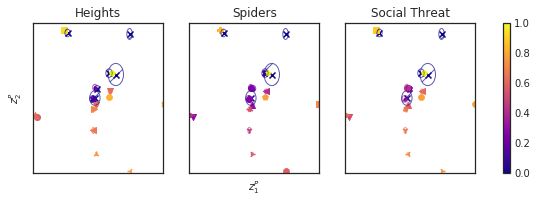

In [32]:
dtfa.heatmap_subject_embedding(heatmaps=[heights_fear_labeler, spiders_fear_labeler, social_threat_fear_labeler],
                               titles=['Heights', 'Spiders', 'Social Threat'], colormap='plasma', filename='affvids_norest_subject_heatmap.pdf')

In [33]:
### this is still Work in Progress ###
hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights = hyperparams['weights']['mu'].data.numpy()
all_factor_centers = hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(hyperparams['factor_log_widths']['mu'].data.numpy())
spider_matrix = []
social_matrix = []
heights_matrix = []
for i in range(dtfa.num_blocks):
    if block_task_labeler(dtfa._blocks[i]) == 'Spiders':
        spider_matrix.append(np.corrcoef(all_weights[i,:,:].T))
    elif  block_task_labeler(dtfa._blocks[i]) == 'Social threat':
        social_matrix.append(np.corrcoef(all_weights[i,:,:].T))
    elif  block_task_labeler(dtfa._blocks[i]) == 'Heights':
        heights_matrix.append(np.corrcoef(all_weights[i,:,:].T))
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))

spider_matrix[spider_matrix < 0] = 0
social_matrix[social_matrix < 0] = 0
heights_matrix[heights_matrix < 0] = 0

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)

social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [34]:
heights_vectors.shape

(236, 4950)

In [35]:
### heights vs others ###
other_vectors = np.vstack((spider_vectors,social_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                           colorbar=True,title='heights-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [36]:
### spiders vs others ###
other_vectors = np.vstack((heights_vectors,social_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spiders-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [37]:
### social vs others ###
other_vectors = np.vstack((heights_vectors,spider_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(social_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                           colorbar=True,title='social-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [38]:
### spider vs social ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spider-social-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [39]:
### social vs spider ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='social-spider-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [40]:
### heights vs social ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='heights-social-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [41]:
### social vs heights ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='social-heights-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [42]:
### heights vs spiders ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],spider_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='heights-spider-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [43]:
### spiders vs heights ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],spider_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spider-heights-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [44]:
def subject_block_labeler(block):
    return subject_labeler(block.subject)

In [45]:
### task classification using leave one out runs ###
from sklearn.svm import SVC
classifier = SVC(C=1., kernel="linear")

# A classifier to set the chance level
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier()

# Make a data splitting object for cross validation
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
cv = LeaveOneGroupOut()

for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_weights[i,:,:].mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    categories = np.unique(targets)

    for category in categories:
        print("Processing %s" % (category))
        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        print("Scores: %1.2f +- %1.2f" % (
            result.mean(),
            result.std()))

        print("Chance Scores: %1.2f +- %1.2f" % (
            result_chance.mean(),
            result_chance.std()))
        
    print ("\n")

Processing Subject 10
Processing Heights
Scores: 0.86 +- 0.04
Chance Scores: 0.64 +- 0.04
Processing Social threat
Scores: 0.89 +- 0.04
Chance Scores: 0.56 +- 0.10
Processing Spiders
Scores: 0.94 +- 0.04
Chance Scores: 0.61 +- 0.20


Processing Subject 11
Processing Heights
Scores: 0.83 +- 0.12
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.86 +- 0.04
Chance Scores: 0.53 +- 0.04
Processing Spiders
Scores: 0.72 +- 0.08
Chance Scores: 0.44 +- 0.04


Processing Subject 12
Processing Heights
Scores: 0.56 +- 0.17
Chance Scores: 0.53 +- 0.14
Processing Social threat
Scores: 0.53 +- 0.10
Chance Scores: 0.64 +- 0.14
Processing Spiders
Scores: 0.56 +- 0.10
Chance Scores: 0.58 +- 0.12


Processing Subject 13
Processing Heights
Scores: 0.78 +- 0.17
Chance Scores: 0.47 +- 0.04
Processing Social threat
Scores: 0.92 +- 0.07
Chance Scores: 0.58 +- 0.00
Processing Spiders
Scores: 0.81 +- 0.10
Chance Scores: 0.44 +- 0.14


Processing Subject 14
Processing Heights
Scores: 0.79 +- 0.04
Ch

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: 

Scores: 0.86 +- 0.08
Chance Scores: 0.67 +- 0.07
Processing Spiders
Scores: 0.89 +- 0.04
Chance Scores: 0.53 +- 0.04


Processing Subject 5
Processing Heights
Scores: 0.81 +- 0.08
Chance Scores: 0.64 +- 0.08
Processing Social threat
Scores: 0.89 +- 0.04
Chance Scores: 0.61 +- 0.14
Processing Spiders
Scores: 0.92 +- 0.07
Chance Scores: 0.50 +- 0.12


Processing Subject 6
Processing Heights
Scores: 0.50 +- 0.07
Chance Scores: 0.61 +- 0.04
Processing Social threat
Scores: 0.44 +- 0.04
Chance Scores: 0.44 +- 0.17
Processing Spiders
Scores: 0.56 +- 0.04
Chance Scores: 0.50 +- 0.07


Processing Subject 7
Processing Heights
Scores: 0.62 +- 0.04
Chance Scores: 0.46 +- 0.13
Processing Social threat
Scores: 0.42 +- 0.00
Chance Scores: 0.71 +- 0.04
Processing Spiders
Scores: 0.54 +- 0.04
Chance Scores: 0.62 +- 0.04


Processing Subject 8
Processing Heights
Scores: 0.83 +- 0.12
Chance Scores: 0.69 +- 0.10
Processing Social threat
Scores: 0.83 +- 0.00
Chance Scores: 0.61 +- 0.04
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: 

In [46]:
data = all_weights.mean(1)
targets = []
subject_labels = []
session_labels = []
for i in range(dtfa.num_blocks):
    block = dtfa._blocks[i]
    session_labels.append(block.run)
    targets.append(task_labeler(block.task))
    subject_labels.append(block.subject)
categories = np.unique(targets)
for category in categories:
    print("Processing %s" % (category))
    classification_target = [t==category for t in targets]
    result = cross_val_score(
        classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    result_chance = cross_val_score(
        dummy_classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    print("Scores: %1.2f +- %1.2f" % (
        result.mean(),
        result.std()))

    print("Chance Scores: %1.2f +- %1.2f" % (
        result_chance.mean(),
        result_chance.std()))

Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.67 +- 0.11
Chance Scores: 0.56 +- 0.06
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.68 +- 0.12
Chance Scores: 0.56 +- 0.08
Processing Spiders
Scores: 0.70 +- 0.12
Chance Scores: 0.57 +- 0.07


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [47]:
from sklearn.feature_selection import SelectPercentile, f_classif
feature_selection = SelectPercentile(f_classif, percentile=5)
from sklearn.pipeline import Pipeline
svc = SVC(C=1., kernel="linear")
classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
data = all_weights.mean(1)
targets = []
subject_labels = []
session_labels = []
data = []
for i in range(dtfa.num_blocks):
    block = dtfa._blocks[i]
    session_labels.append(block.run)
    targets.append(task_labeler(block.task))
    data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
    subject_labels.append(block.subject)
categories = np.unique(targets)
for category in categories:
    print("Processing %s" % (category))
    classification_target = [t==category for t in targets]
    result = cross_val_score(
        classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    result_chance = cross_val_score(
        dummy_classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    print("Scores: %1.2f +- %1.2f" % (
        result.mean(),
        result.std()))

    print("Chance Scores: %1.2f +- %1.2f" % (
        result_chance.mean(),
        result_chance.std()))

Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.67 +- 0.12
Chance Scores: 0.59 +- 0.09
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.62 +- 0.13
Chance Scores: 0.58 +- 0.07
Processing Spiders
Scores: 0.67 +- 0.13
Chance Scores: 0.58 +- 0.08


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [48]:
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    categories = np.unique(targets)

    for category in categories:
        print("Processing %s" % (category))
        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        print("Scores: %1.2f +- %1.2f" % (
            result.mean(),
            result.std()))

        print("Chance Scores: %1.2f +- %1.2f" % (
            result_chance.mean(),
            result_chance.std()))
        
    print ("\n")

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Processing Subject 10
Processing Heights
Scores: 0.89 +- 0.08
Chance Scores: 0.75 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.86 +- 0.04
Chance Scores: 0.58 +- 0.07
Processing Spiders
Scores: 0.97 +- 0.04
Chance Scores: 0.53 +- 0.14


Processing Subject 11
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.83 +- 0.07
Chance Scores: 0.53 +- 0.04
Processing Social threat
Scores: 0.86 +- 0.04
Chance Scores: 0.47 +- 0.26
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.78 +- 0.20
Chance Scores: 0.67 +- 0.07


Processing Subject 12
Processing Heights
Scores: 0.58 +- 0.07
Chance Scores: 0.58 +- 0.07
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.64 +- 0.08
Chance Scores: 0.69 +- 0.04
Processing Spiders
Scores: 0.58 +- 0.07
Chance Scores: 0.53 +- 0.04


Processing Subject 13
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.83 +- 0.12
Chance Scores: 0.50 +- 0.18
Processing Social threat
Scores: 0.89 +- 0.04
Chance Scores: 0.44 +- 0.04
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.81 +- 0.14
Chance Scores: 0.61 +- 0.22


Processing Subject 14
Processing Heights
Scores: 0.83 +- 0.08
Chance Scores: 0.42 +- 0.00
Processing Social threat
Scores: 0.79 +- 0.04
Chance Scores: 0.58 +- 0.00
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.96 +- 0.04
Chance Scores: 0.50 +- 0.08


Processing Subject 15
Processing Heights
Scores: 0.81 +- 0.04
Chance Scores: 0.61 +- 0.10
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.78 +- 0.10
Chance Scores: 0.53 +- 0.10
Processing Spiders
Scores: 0.78 +- 0.14
Chance Scores: 0.61 +- 0.14


Processing Subject 16
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.53 +- 0.21
Processing Social threat
Scores: 0.97 +- 0.04
Chance Scores: 0.53 +- 0.17
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.97 +- 0.04
Chance Scores: 0.56 +- 0.08


Processing Subject 17
Processing Heights
Scores: 0.89 +- 0.04
Chance Scores: 0.64 +- 0.14
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.86 +- 0.04
Chance Scores: 0.53 +- 0.04
Processing Spiders
Scores: 0.78 +- 0.08
Chance Scores: 0.53 +- 0.10


Processing Subject 18
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.72 +- 0.04
Chance Scores: 0.58 +- 0.18
Processing Social threat
Scores: 0.72 +- 0.08
Chance Scores: 0.53 +- 0.10
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.75 +- 0.00
Chance Scores: 0.58 +- 0.07


Processing Subject 19
Processing Heights
Scores: 0.78 +- 0.04
Chance Scores: 0.44 +- 0.04
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.61 +- 0.16
Processing Spiders
Scores: 0.78 +- 0.04
Chance Scores: 0.61 +- 0.04


Processing Subject 23
Processing Heights
Scores: 0.62 +- 0.04
Chance Scores: 0.50 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.71 +- 0.04
Chance Scores: 0.58 +- 0.08
Processing Spiders
Scores: 0.75 +- 0.00
Chance Scores: 0.46 +- 0.04


Processing Subject 25
Processing Heights
Scores: 0.78 +- 0.08
Chance Scores: 0.47 +- 0.10
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.92 +- 0.00
Chance Scores: 0.58 +- 0.07
Processing Spiders
Scores: 0.94 +- 0.04
Chance Scores: 0.72 +- 0.04


Processing Subject 26
Processing Heights
Scores: 0.88 +- 0.04
Chance Scores: 0.58 +- 0.08
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.75 +- 0.08
Chance Scores: 0.67 +- 0.17
Processing Spiders
Scores: 0.71 +- 0.12
Chance Scores: 0.71 +- 0.12


Processing Subject 28
Processing Heights
Scores: 0.78 +- 0.08
Chance Scores: 0.56 +- 0.08
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.47 +- 0.04
Processing Spiders
Scores: 0.97 +- 0.04
Chance Scores: 0.61 +- 0.08


Processing Subject 29
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.50 +- 0.07
Processing Social threat
Scores: 0.92 +- 0.00
Chance Scores: 0.64 +- 0.04
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.92 +- 0.00
Chance Scores: 0.61 +- 0.08


Processing Subject 4
Processing Heights
Scores: 0.75 +- 0.07
Chance Scores: 0.50 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.89 +- 0.10
Chance Scores: 0.64 +- 0.14
Processing Spiders
Scores: 0.89 +- 0.10
Chance Scores: 0.50 +- 0.14


Processing Subject 5
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.78 +- 0.04
Chance Scores: 0.61 +- 0.04
Processing Social threat
Scores: 0.89 +- 0.04
Chance Scores: 0.53 +- 0.17
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.97 +- 0.04
Chance Scores: 0.61 +- 0.10


Processing Subject 6
Processing Heights
Scores: 0.53 +- 0.08
Chance Scores: 0.50 +- 0.07
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.61 +- 0.08
Chance Scores: 0.58 +- 0.00
Processing Spiders
Scores: 0.69 +- 0.04
Chance Scores: 0.53 +- 0.10


Processing Subject 7
Processing Heights
Scores: 0.58 +- 0.00
Chance Scores: 0.46 +- 0.29
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.38 +- 0.12
Chance Scores: 0.54 +- 0.04
Processing Spiders
Scores: 0.58 +- 0.00
Chance Scores: 0.46 +- 0.13


Processing Subject 8
Processing Heights
Scores: 0.75 +- 0.12
Chance Scores: 0.69 +- 0.04
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.81 +- 0.04
Chance Scores: 0.50 +- 0.12
Processing Spiders
Scores: 0.94 +- 0.04
Chance Scores: 0.56 +- 0.08


Processing Subject 9
Processing Heights


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Scores: 0.64 +- 0.04
Chance Scores: 0.58 +- 0.00
Processing Social threat
Scores: 0.50 +- 0.14
Chance Scores: 0.53 +- 0.14
Processing Spiders
Scores: 0.64 +- 0.10
Chance Scores: 0.56 +- 0.20




/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
